In [11]:
# import pandas e numpy
import pandas#; import numpy
import numpy

# Questão 4 blah blah +1
    # Vamos definir 'AgeGroup' como a idade arredondada às dezenas. Portanto há um age group [0, 10[, outro [10, 20[, etc.
    #
    # Produzam um CSV com o seguinte conteúdo:
    # Sex,AgeGroup,SurvivalRate
    # Male,0-10,XXX
    # Male,10-20,YYY
    # Male,20-30,ZZZ
    # ...
    # Male,90-100,WWW
    # Female,0-10,AAA
    # Female,10-20,BBB
    # ...
    # Female,90-100,CCC
    #
    # Onde XXX, YYY, ZZZ, AAA, etc são as fracções de sobreviventes em cada um desses grupos.
    #
    # Embora naturalmente possam responder a isto fazendo a questão 3 repetidas vezes, eu quero que usem a função 'groupby' do pandas.

In [13]:
# Carregar dataframe do Titanic
df = pandas.read_csv('titanic.csv')

In [25]:
y = df.groupby('Survived')
z=y.get_group(1)

bins = [0, 9.9, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9,79.9,89.9]
labels=['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[']

a = df[df['Survived'] == 1].groupby(['Sex', pandas.cut(z["Age"], bins=bins,labels=labels)]).size().reset_index(name='Persons_Survived')
print(a)


b = df.groupby(['Sex',pandas.cut(df["Age"], bins=bins,labels=labels)]).size().reset_index(name='Persons')
print(b)

       Sex      Age  Persons_Survived
0   female   [0-10[                19
1   female  [10-20[                34
2   female  [20-30[                52
3   female  [30-40[                50
4   female  [40-50[                22
5   female  [50-60[                16
6   female  [60-70[                 4
7   female  [70-80[                 0
8   female  [80-90[                 0
9     male   [0-10[                19
10    male  [10-20[                 7
11    male  [20-30[                25
12    male  [30-40[                23
13    male  [40-50[                12
14    male  [50-60[                 4
15    male  [60-70[                 2
16    male  [70-80[                 0
17    male  [80-90[                 1
       Sex      Age  Persons
0   female   [0-10[       30
1   female  [10-20[       45
2   female  [20-30[       72
3   female  [30-40[       60
4   female  [40-50[       32
5   female  [50-60[       18
6   female  [60-70[        4
7   female  [70-80[        0
8   female  [80-9

In [27]:
a['Survival_Rate'] = a['Persons_Survived'] / b['Persons']
#a.drop('Persons', inplace=True, axis=1)
print(a)

del a['Persons_Survived']

a=a.rename(columns={'Age':'Age_group'})
print(a)

       Sex      Age  Persons_Survived  Survival_Rate
0   female   [0-10[                19       0.633333
1   female  [10-20[                34       0.755556
2   female  [20-30[                52       0.722222
3   female  [30-40[                50       0.833333
4   female  [40-50[                22       0.687500
5   female  [50-60[                16       0.888889
6   female  [60-70[                 4       1.000000
7   female  [70-80[                 0            NaN
8   female  [80-90[                 0            NaN
9     male   [0-10[                19       0.593750
10    male  [10-20[                 7       0.122807
11    male  [20-30[                25       0.168919
12    male  [30-40[                23       0.214953
13    male  [40-50[                12       0.210526
14    male  [50-60[                 4       0.133333
15    male  [60-70[                 2       0.133333
16    male  [70-80[                 0       0.000000
17    male  [80-90[                 1       1.

In [28]:
a.to_csv('Question4_RESULT_B.csv', index = False)
df2 = pandas.read_csv('Question4_RESULT_B.csv')
df2

,Sex,Age_group,Survival_Rate
0,female,[0-10[,0.633333
1,female,[10-20[,0.755556
2,female,[20-30[,0.722222
3,female,[30-40[,0.833333
4,female,[40-50[,0.687500
5,female,[50-60[,0.888889
6,female,[60-70[,1.000000
7,female,[70-80[,NaN
8,female,[80-90[,NaN
9,male,[0-10[,0.593750


In [29]:
# import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rate')

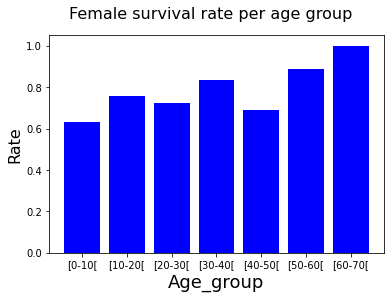

In [30]:
# Female survival rate plot

grouped = df2.groupby('Sex')
a=grouped.get_group('female')

x=a['Age_group']

y1=a['Survival_Rate']

fig = plt.figure()

plt.bar(x, y1,color='b')

fig.suptitle('Female survival rate per age group', fontsize=16)

plt.xlabel('Age_group', fontsize=18)
plt.ylabel('Rate', fontsize=16)

Text(0, 0.5, 'Rate')

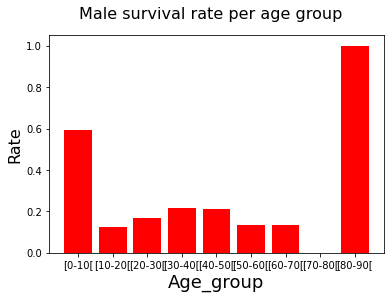

In [31]:
# Male survival rate plot

b=grouped.get_group('male')
y2=b['Survival_Rate']

fig = plt.figure()

plt.bar(x, y2,color='r')

fig.suptitle('Male survival rate per age group', fontsize=16)

plt.xlabel('Age_group', fontsize=18)
plt.ylabel('Rate', fontsize=16)